<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Packages**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

In [60]:
rna = pd.read_csv('/content/codon_usage.csv', low_memory=False)
rna.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [61]:
rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [62]:
rna.iloc[:, :6].isnull().sum()

,0
Kingdom,0
DNAtype,0
SpeciesID,0
Ncodons,0
SpeciesName,0
UUU,0


In [63]:
rna.iloc[:, :6].nunique()

,0
Kingdom,11
DNAtype,11
SpeciesID,12368
Ncodons,7103
SpeciesName,13016
UUU,4791


In [64]:
rna.Kingdom.value_counts()

,count
Kingdom,
bct,2920
vrl,2832
pln,2523
vrt,2077
inv,1345
mam,572
phg,220
rod,215
pri,180


In [65]:
rna.nunique()

,0
Kingdom,11
DNAtype,11
SpeciesID,12368
Ncodons,7103
SpeciesName,13016
...,...
GAA,4827
GAG,4686
UAA,703
UAG,422


In [66]:
rna.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


## **Data Cleaning**

In [67]:
rna.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

In [68]:
#Dropping the SpeciesID and SpeciesName column
rna.drop(['SpeciesID'], inplace=True, axis=1)

In [69]:
rna.columns

Index(['Kingdom', 'DNAtype', 'Ncodons', 'SpeciesName', 'UUU', 'UUC', 'UUA',
       'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU',
       'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA',
       'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG',
       'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG',
       'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC',
       'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG',
       'UGA'],
      dtype='object')

In [70]:
rna.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [71]:
# Converting the UUU and UUC columns into floats
rna['UUU'] = pd.to_numeric(rna['UUU'], errors='coerce')


In [72]:
rna['UUU'].dtypes

dtype('float64')

In [73]:
rna['UUU'].isnull().sum()

2

In [74]:
rna['UUC'].replace('-', np.nan, inplace=True)

In [75]:
rna['UUC'] = rna['UUC'].astype(float)

In [76]:
rna['UUC'].dtypes

dtype('float64')

In [77]:
rna['UUC'].isnull().sum()

1

In [78]:
rna.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [79]:
rna.shape

(13028, 68)

In [80]:
rna = rna.dropna()
rna = rna.reset_index(drop=True)

In [81]:
rna.shape

(13026, 68)

In [82]:
rna.iloc[:, :10].isnull().sum()

,0
Kingdom,0
DNAtype,0
Ncodons,0
SpeciesName,0
UUU,0
UUC,0
UUA,0
UUG,0
CUU,0
CUC,0


## **Hierarchical Clustering**

**Using Kingdom as labels**

In [83]:
rna.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [84]:
rna = grouped.copy()

In [86]:
grouped.head()

,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0,28404730,Pyrobaculum spherical virusSulfolobus virus ST...,2.27451,2.72963,2.23911,1.28628,2.17459,2.77570,1.31569,...,0.65047,1.92703,2.19655,3.26474,3.75773,4.52231,5.04117,0.18459,0.07267,0.18258
bct,10,582110073,Onion yellow dwarf virusChlamydia phage Chp2St...,55.56924,56.47296,49.10417,38.81248,36.09429,46.42350,17.28242,...,29.83836,19.63168,10.40845,85.01409,81.74292,102.33432,77.42760,4.05546,1.56531,4.05678
inv,512,69237336,Conus tessulatusmitochondrion Dicyema misakien...,48.79745,28.72477,43.31489,24.08442,21.02481,15.67659,13.55844,...,4.58710,18.63647,8.85965,33.95962,26.21142,39.14338,29.62906,3.30732,1.01165,8.73636
mam,470,11383083,mitochondrion Lobodon carcinophagamitochondrio...,13.26039,21.27826,13.98999,2.64106,10.30322,15.09258,33.94041,...,1.30129,1.76629,1.28227,5.16371,10.49819,10.05068,4.88348,0.61857,0.26878,12.90431
phg,0,2255279,Enterobacteria phage ES18Enterobacteria phage ...,4.81014,3.92179,3.30557,2.60048,4.04033,2.28171,1.52118,...,1.13505,1.65530,0.91352,7.43536,5.40504,7.61476,5.32245,0.52836,0.06964,0.43920


In [87]:
#Grouping by the kingdom and sum it up
grouped = rna.groupby('Kingdom').sum()
grouped


,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0,28404730,Pyrobaculum spherical virusSulfolobus virus ST...,2.27451,2.72963,2.23911,1.28628,2.17459,2.77570,1.31569,...,0.65047,1.92703,2.19655,3.26474,3.75773,4.52231,5.04117,0.18459,0.07267,0.18258
bct,10,582110073,Onion yellow dwarf virusChlamydia phage Chp2St...,55.56924,56.47296,49.10417,38.81248,36.09429,46.42350,17.28242,...,29.83836,19.63168,10.40845,85.01409,81.74292,102.33432,77.42760,4.05546,1.56531,4.05678
inv,512,69237336,Conus tessulatusmitochondrion Dicyema misakien...,48.79745,28.72477,43.31489,24.08442,21.02481,15.67659,13.55844,...,4.58710,18.63647,8.85965,33.95962,26.21142,39.14338,29.62906,3.30732,1.01165,8.73636
mam,470,11383083,mitochondrion Lobodon carcinophagamitochondrio...,13.26039,21.27826,13.98999,2.64106,10.30322,15.09258,33.94041,...,1.30129,1.76629,1.28227,5.16371,10.49819,10.05068,4.88348,0.61857,0.26878,12.90431
phg,0,2255279,Enterobacteria phage ES18Enterobacteria phage ...,4.81014,3.92179,3.30557,2.60048,4.04033,2.28171,1.52118,...,1.13505,1.65530,0.91352,7.43536,5.40504,7.61476,5.32245,0.52836,0.06964,0.43920
plm,0,226736,Plasmid pIPO2TPlasmid pSB102Plasmid pCD4IncN p...,0.28550,0.37077,0.16412,0.24931,0.25463,0.23979,0.10703,...,0.24649,0.08020,0.07661,0.48292,0.50871,0.62960,0.48909,0.02461,0.01063,0.03591
pln,1926,155196159,chloroplast Polygonatum involucratumMorchella ...,74.08799,58.69001,55.10367,49.62655,51.85933,36.50113,26.08284,...,11.76694,31.92729,18.88740,73.23755,47.01618,75.31347,61.71576,3.09371,1.48539,3.06643
pri,97,53884861,mitochondrion Lepilemur leucopusPapio papiomit...,4.09618,5.69982,3.44914,1.19749,3.64992,5.34885,7.19583,...,0.97032,0.98853,1.08560,2.06938,3.38877,4.18473,3.22082,0.42999,0.09643,2.32819
rod,156,33599963,Sciurus abertimitochondrion Sciurus abertimito...,5.57271,8.37418,5.60062,1.14516,4.45888,4.88491,9.93935,...,0.60971,0.86989,0.64290,2.89748,4.35044,4.04854,2.37204,0.27048,0.06820,4.47204


In [88]:
rna2 = grouped.reset_index()

In [89]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [90]:
X = grouped.drop(['SpeciesName'], axis=1)

#Scaling the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


#Performing hierarchical clustering
linked = linkage(X_scaled, method='ward')

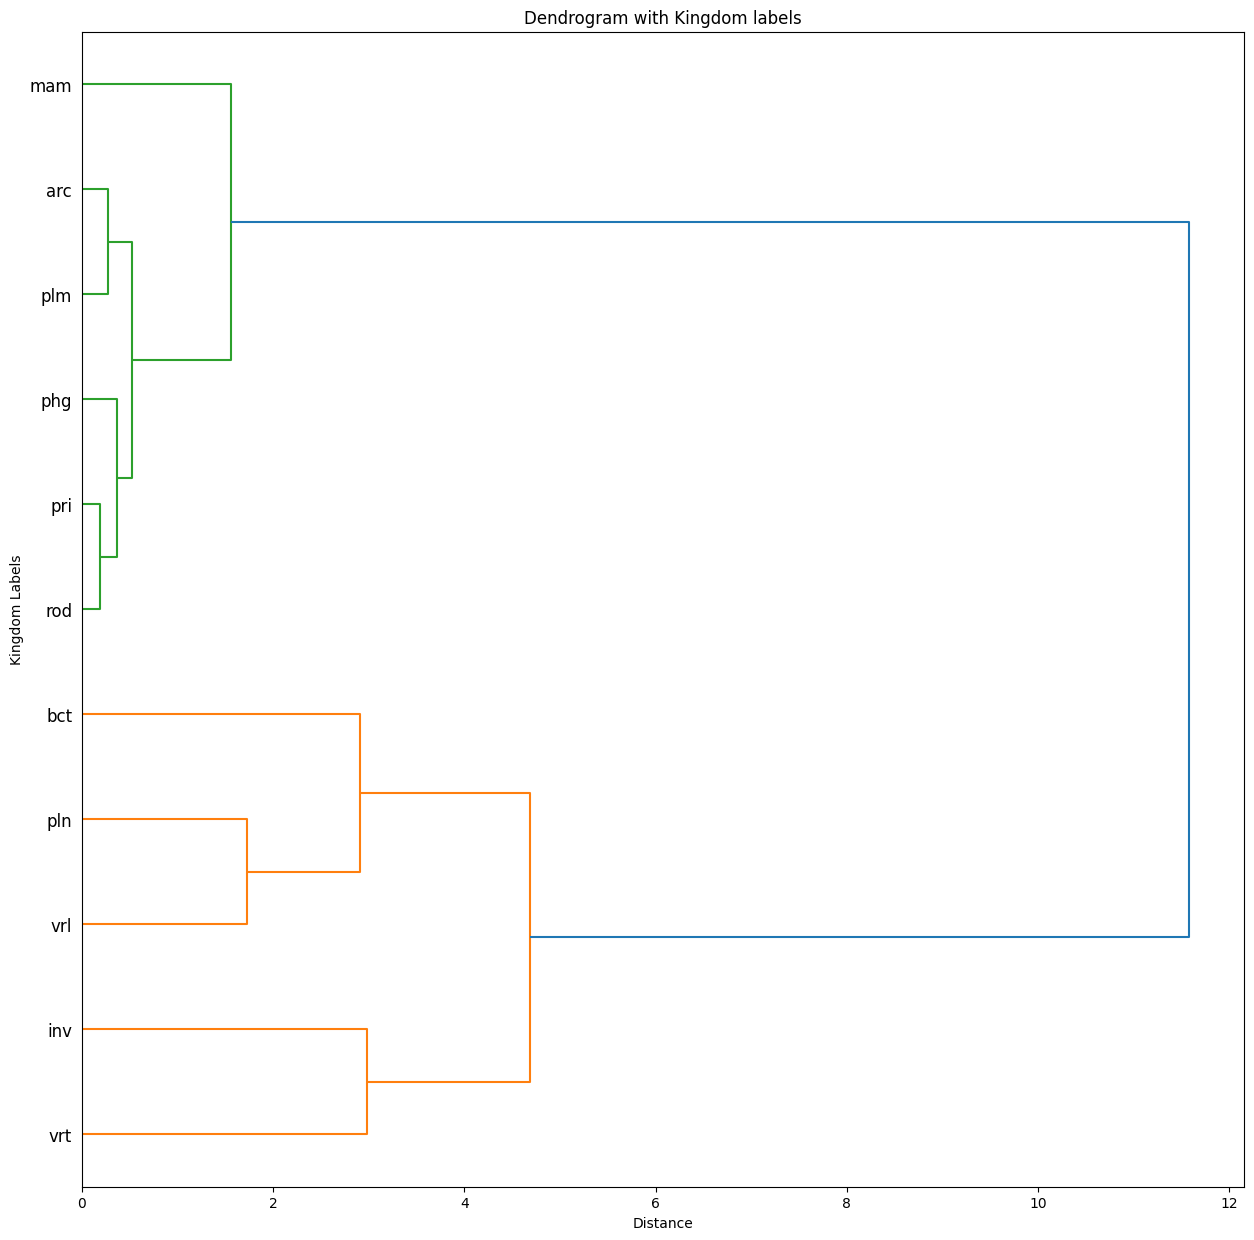

In [91]:
#Creating a dendrogram
plt.figure(figsize=(15, 15))
dendrogram(linked,
           orientation='right',
           labels=grouped.index.values,
           distance_sort = 'descending',
           show_leaf_counts=True)

#plt.yticks(rotation=45, ha='right', fontsize=10)
plt.title('Dendrogram with Kingdom labels')
plt.ylabel('Kingdom Labels')
plt.xlabel('Distance')
plt.show()

## **K-Means Clustering**

In [92]:
from sklearn.cluster import KMeans

In [93]:
kmeans = KMeans(n_clusters = 11, init = 'k-means++', n_init=11)
kmeans.fit(X_scaled)
labels = kmeans.labels_
print(labels)

[ 9  4  2  6  8  7  1  0 10  5  3]


In [100]:
rna.shape

(11, 67)

In [99]:
rna2 = rna.copy()

In [95]:
rna2.head()

,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0,28404730,Pyrobaculum spherical virusSulfolobus virus ST...,2.27451,2.72963,2.23911,1.28628,2.17459,2.77570,1.31569,...,0.65047,1.92703,2.19655,3.26474,3.75773,4.52231,5.04117,0.18459,0.07267,0.18258
bct,10,582110073,Onion yellow dwarf virusChlamydia phage Chp2St...,55.56924,56.47296,49.10417,38.81248,36.09429,46.42350,17.28242,...,29.83836,19.63168,10.40845,85.01409,81.74292,102.33432,77.42760,4.05546,1.56531,4.05678
inv,512,69237336,Conus tessulatusmitochondrion Dicyema misakien...,48.79745,28.72477,43.31489,24.08442,21.02481,15.67659,13.55844,...,4.58710,18.63647,8.85965,33.95962,26.21142,39.14338,29.62906,3.30732,1.01165,8.73636
mam,470,11383083,mitochondrion Lobodon carcinophagamitochondrio...,13.26039,21.27826,13.98999,2.64106,10.30322,15.09258,33.94041,...,1.30129,1.76629,1.28227,5.16371,10.49819,10.05068,4.88348,0.61857,0.26878,12.90431
phg,0,2255279,Enterobacteria phage ES18Enterobacteria phage ...,4.81014,3.92179,3.30557,2.60048,4.04033,2.28171,1.52118,...,1.13505,1.65530,0.91352,7.43536,5.40504,7.61476,5.32245,0.52836,0.06964,0.43920


In [96]:
rna2['Clusters'] = labels
rna2.head()

,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Clusters
Kingdom,,,,,,,,,,,,,,,,,,,,,
arc,0,28404730,Pyrobaculum spherical virusSulfolobus virus ST...,2.27451,2.72963,2.23911,1.28628,2.17459,2.77570,1.31569,...,1.92703,2.19655,3.26474,3.75773,4.52231,5.04117,0.18459,0.07267,0.18258,9
bct,10,582110073,Onion yellow dwarf virusChlamydia phage Chp2St...,55.56924,56.47296,49.10417,38.81248,36.09429,46.42350,17.28242,...,19.63168,10.40845,85.01409,81.74292,102.33432,77.42760,4.05546,1.56531,4.05678,4
inv,512,69237336,Conus tessulatusmitochondrion Dicyema misakien...,48.79745,28.72477,43.31489,24.08442,21.02481,15.67659,13.55844,...,18.63647,8.85965,33.95962,26.21142,39.14338,29.62906,3.30732,1.01165,8.73636,2
mam,470,11383083,mitochondrion Lobodon carcinophagamitochondrio...,13.26039,21.27826,13.98999,2.64106,10.30322,15.09258,33.94041,...,1.76629,1.28227,5.16371,10.49819,10.05068,4.88348,0.61857,0.26878,12.90431,6
phg,0,2255279,Enterobacteria phage ES18Enterobacteria phage ...,4.81014,3.92179,3.30557,2.60048,4.04033,2.28171,1.52118,...,1.65530,0.91352,7.43536,5.40504,7.61476,5.32245,0.52836,0.06964,0.43920,8


In [98]:
rna2.shape

(11, 68)

In [97]:
rna2.Clusters.value_counts()

,count
Clusters,
9,1
4,1
2,1
6,1
8,1
7,1
1,1
0,1
10,1


In [ ]:
rna2.Clusters.unique()

array([1, 0, 2], dtype=int32)

In [ ]:
rna2.groupby('Clusters').mean(numeric_only=True)

,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.349314,63860.820505,0.031988,0.017535,0.027514,0.018541,0.018199,0.009348,0.011139,0.010705,...,0.003648,0.015441,0.008155,0.033058,0.016449,0.035895,0.019995,0.001719,0.000619,0.002103
1,0.008511,153205.405851,0.011816,0.026414,0.003581,0.011943,0.010580,0.023999,0.004516,0.037645,...,0.011341,0.005536,0.007110,0.019386,0.035315,0.021379,0.036055,0.000995,0.000559,0.001296
2,0.996583,8036.058949,0.024490,0.036132,0.027688,0.004449,0.028333,0.035555,0.065768,0.010541,...,0.001333,0.000684,0.000193,0.005624,0.012383,0.016898,0.003594,0.002442,0.000555,0.026078


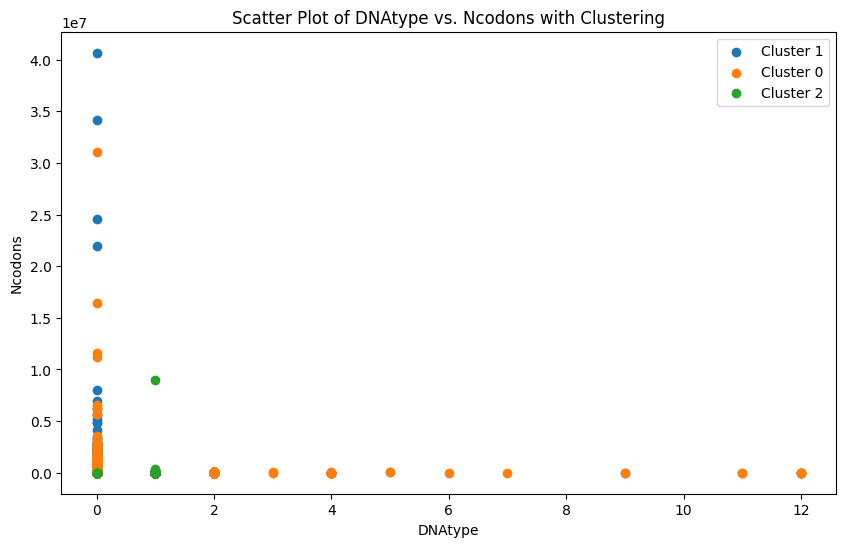

In [ ]:
#Visualizing a scatterplot of DNAtype against Ncodons with cluster as the clusters
data = {
    'DNAtype':[],
    'Ncodons':[],
    'Cluster':[]
}

for cluster_id, row in rna2.iterrows():
  data['DNAtype'].append(row['DNAtype'])
  data['Ncodons'].append(row['Ncodons'])
  data['Cluster'].append(row['Clusters'])

plot_df = pd.DataFrame(data)

#Create a scatterplot
plt.figure(figsize=(10, 6))
for cluster_id in plot_df['Cluster'].unique():
  cluster_data = plot_df[plot_df['Cluster'] ==  cluster_id]
  plt.scatter(cluster_data['DNAtype'], cluster_data['Ncodons'], label=f'Cluster {cluster_id}')

plt.xlabel('DNAtype')
plt.ylabel('Ncodons')
plt.title('Scatter Plot of DNAtype vs. Ncodons with Clustering')
plt.legend()
plt.show()

## **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

[0 0 1 ... 1 1 1]


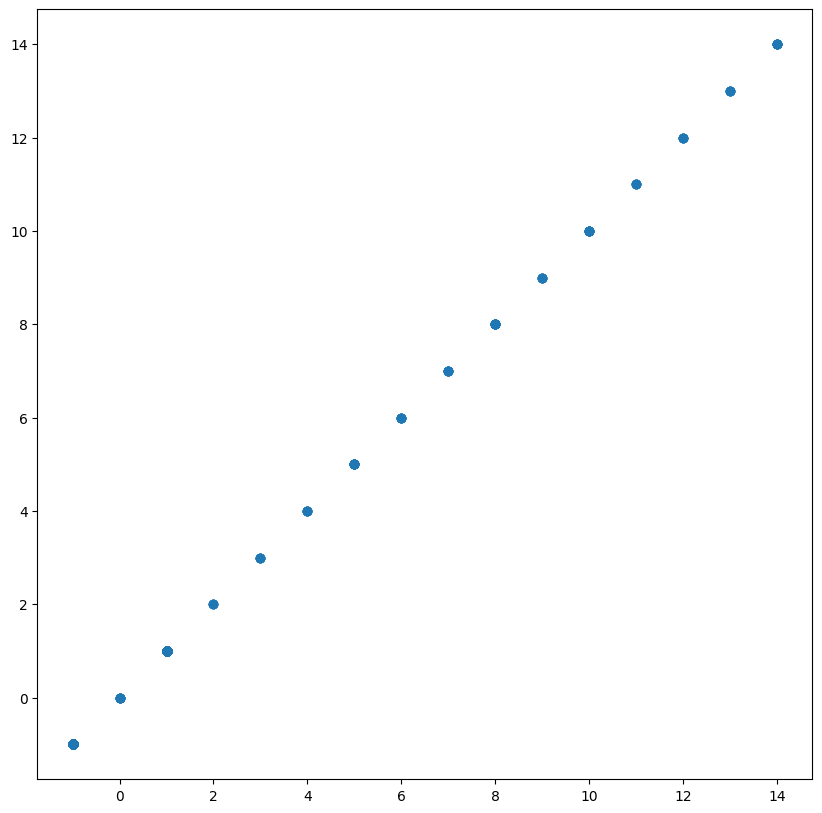

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(X_scaled)
labels = dbscan.labels_
print(labels)

#Plotting a scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(labels, labels)
plt.show()


## **Feature Transformation**

In [ ]:
rna.columns

Index(['Kingdom', 'DNAtype', 'Ncodons', 'SpeciesName', 'UUU', 'UUC', 'UUA',
       'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU',
       'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA',
       'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG',
       'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG',
       'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC',
       'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG',
       'UGA'],
      dtype='object')

In [ ]:
rna_feature = rna[['DNAtype', 'Ncodons',  'UUU', 'UUC', 'UUA',
       'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU',
       'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA',
       'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG',
       'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG',
       'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC',
       'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG',
       'UGA' ]]

rna_feature.head()


,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,4862,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


Min-Max Scaler is suitable for:
Algorithms sensitive to scale, such as neural networks and distance-based algorithms (K-Nearest Neighbors).
Sparse data, as it preserves sparsity.
Models where features have different units or ranges, to ensure equal contribution to the model.
Min-Max Scaler’s transformation is based on the minimum and maximum values of each feature, scaling them to a common range (typically [0, 1]).
Unlike StandardScaler, Min-Max Scaler does not assume a specific distribution and is more robust to outliers.
Min-Max Scaler can be used as a preprocessing step before training a machine learning model, such as logistic regression.

In [ ]:
# Using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rna_feature_scaled = scaler.fit_transform(rna_feature)
print(rna_feature_scaled)

[[0.00000000e+00 2.44702727e-05 7.61159687e-02 ... 5.55309735e-02
  1.95236236e-02 0.00000000e+00]
 [0.00000000e+00 1.16571952e-05 1.24896457e-01 ... 5.99557522e-02
  2.65521281e-02 0.00000000e+00]
 [0.00000000e+00 9.49790886e-05 9.08421537e-02 ... 8.65044248e-02
  0.00000000e+00 1.34957826e-02]
 ...
 [8.33333333e-02 1.68709619e-05 6.54855039e-02 ... 7.87610619e-02
  4.64662241e-02 1.89034677e-01]
 [0.00000000e+00 1.00000000e+00 8.08559595e-02 ... 2.19026549e-02
  3.08473253e-02 1.46204311e-02]
 [8.33333333e-02 2.21289914e-01 8.18223654e-02 ... 3.45132743e-02
  4.45138618e-02 2.02530459e-01]]


In [ ]:
dist_matrix = distance_matrix(rna_feature_scaled, rna_feature_scaled)
print(dist_matrix)

[[0.         0.38928545 0.94493444 ... 1.47515749 1.22700362 1.3351641 ]
 [0.38928545 0.         0.94437158 ... 1.44787355 1.24610339 1.31150987]
 [0.94493444 0.94437158 0.         ... 1.40452914 1.17116139 1.20578005]
 ...
 [1.47515749 1.44787355 1.40452914 ... 0.         1.6178877  0.51408096]
 [1.22700362 1.24610339 1.17116139 ... 1.6178877  0.         1.32194152]
 [1.3351641  1.31150987 1.20578005 ... 0.51408096 1.32194152 0.        ]]


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 11, linkage = 'average')
agglom.fit(dist_matrix)
agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([9, 9, 0, ..., 2, 5, 2])

In [ ]:
# Add it to our data frame to indicate which cluster a row belongs to
rna['Cluster_'] = agglom.labels_
rna.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Cluster_
0,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9
1,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9
2,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,0
3,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,0
4,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,0
